# **Pandas**

- 대표적인 데이터 분석 라이브러리
- 직관적인 데이터 세트 병합 및 결합
- 데이터 세트의 유연한 재구성
- 시계열 특정 기능

## 1.Pandas 파일 읽어오기

In [1]:
# pandas 패키지 로드하여 pd로 사용
import pandas as pd
import numpy as np

In [2]:
# colab 업로드 메뉴를 통해 드라이브 업로드
# csv 파일 읽어오기
from google.colab import drive
drive.mount( '/drive' )

Mounted at /drive


In [3]:
# 타입 확인
titanic = pd.read_csv('/drive/MyDrive/Colab/AI2/Third_ML/titanic.csv')
print(type(titanic))

<class 'pandas.core.frame.DataFrame'>


## 2.데이터 내용 확인

- `.head()` : 데이터의 상단 부분 출력
- `.tail()` : 데이터의 하단 부분 출력

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
# 데이터의 column 확인
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 3.특정 columns 선택 방법

- 인덱싱

In [8]:
# 하나의 columns 확인
names = titanic["Name"]
names.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

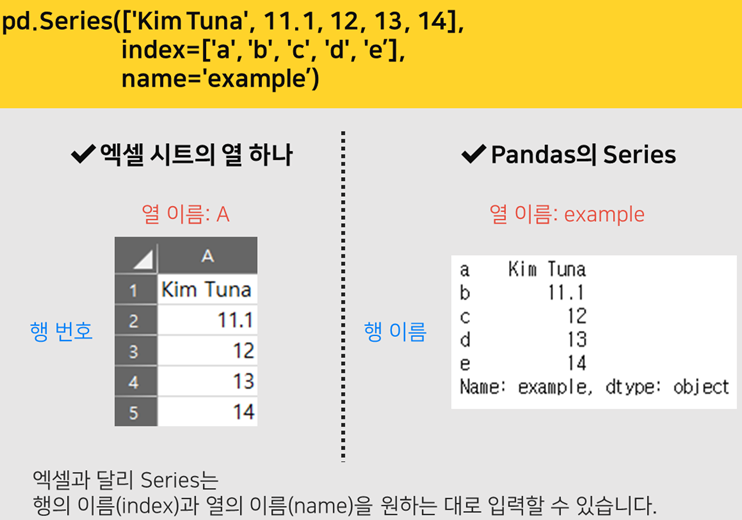

In [9]:
# 데이터 타입 확인
type(names)

pandas.core.series.Series

In [10]:
# 데이터 형상 확인
print(names.shape)
print(titanic.shape)

(891,)
(891, 12)


In [11]:
# 여러개의 columns 확인
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# "sex", "age" column만 추출하여 재 구성
passenger = titanic[["Sex", "Age"]]
passenger

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [13]:
# 데이터 타입 확인
type(passenger)

pandas.core.frame.DataFrame

In [14]:
# 데이터 형상(shape) 확인
passenger.shape

(891, 2)

## 4.데이터 필터링

- 불리언 인덱싱

In [15]:
# 35살 초과, 불리언 데이터 시리즈
above35 = passenger[passenger["Age"] > 35]
print(passenger["Age"] > 35, '\n')
print(above35.head())

0      False
1       True
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool 

       Sex   Age
1   female  38.0
6     male  54.0
11  female  58.0
13    male  39.0
15  female  55.0


- 불리언 인덱싱 + `.isin()`: 데이터 범위 조건

In [16]:
# isin 함수는 각각의 요소가 Data Frame 또는 Series에 존재하는지 파악
titanic["Pclass"].isin([1])

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Pclass, Length: 891, dtype: bool

In [17]:
# isin([]) 함수를 사용하여 Pclass의 특정 범위만 추출
class1 = titanic[titanic["Pclass"].isin([1])]
class1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [18]:
# isin([]) 함수를 사용하여 Pclass의 20살부터 40살까지의 범위만 추출
age2040 = passenger[passenger["Age"].isin(np.arange(20,41))]
age2040.head()

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


In [19]:
# 아래 3개는 모두 같은 결과.
# 범위를 한정하여 추출하는 방법 소개
class23 = titanic[titanic["Pclass"].isin([2, 3])]
class23 = titanic[(titanic["Pclass"]==2) | (titanic["Pclass"]==3)]

class23.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S


- `.notna()`: Null 값 제외

In [20]:
# Null값 파악을 위한 데이터 확인
passenger.head(20)

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
5,male,NaN
6,male,54.0
7,male,2.0
8,female,27.0
9,female,14.0


In [21]:
# notna() 함수를 이용하여 Age 변수의 null 값 제거
ages = titanic[titanic["Age"].notna()]
ages.head(10)
print(titanic.shape)
print(ages.shape)

(891, 12)
(714, 12)


## 5.특정 row와 특정 columns 선택 방법

- `.loc[]` : key로 검색
- `.iloc[]` : 인덱스로 검색

In [22]:
# .loc[key1, key2]
names35 = titanic.loc[titanic["Age"] > 35, ["Name", "Age"]]
names35.head()

,Name,Age
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
6,"McCarthy, Mr. Timothy J",54.0
11,"Bonnell, Miss. Elizabeth",58.0
13,"Andersson, Mr. Anders Johan",39.0
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0


In [23]:
# .iloc[row,col]
df = titanic.iloc[9:25, 2:5]
df

df.iloc[0:3, 1] = "NO Name"
df

,Pclass,Name,Sex
9,2,NO Name,female
10,3,NO Name,female
11,1,NO Name,female
12,3,"Saundercock, Mr. William Henry",male
13,3,"Andersson, Mr. Anders Johan",male
14,3,"Vestrom, Miss. Hulda Amanda Adolfina",female
15,2,"Hewlett, Mrs. (Mary D Kingcome)",female
16,3,"Rice, Master. Eugene",male
17,2,"Williams, Mr. Charles Eugene",male
18,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female


## ★6.데이터 통계 (매우 중요!!!)★
- `.mean()`
- `.median()` : 중간값
- `.describe()` : 다양한 통계량을 요약
    *   모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
    *   각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})
- `.agg()` : 여러개의 열에 여러가지 함수를 적용
- `.groupby()` : 그룹별 집계
- `.value_counts()`

In [24]:
# age 변수의 평균 구하기
print(titanic["Age"].mean())
print(titanic["Age"].median())

29.69911764705882
28.0


In [25]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
# describe() 함수를 통해 다양한 통계량을 요약
# 특정 변수 "Age", "Fare" 추출
titanic[["Age", "Fare"]].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [27]:
# agg()를 통해 여러 개의 열에 여러가지 함수를 적용
# 모든열에 여러 함수를 매핑 : group객체.agg([함수1,함수2,함수3,…])
# 각 열마다 다른 함수를 매핑 : group객체.agg({‘열1’: 함수1, ‘열2’:함수2, …})
titanic.agg({"Age":["min", "max", 'median', "std", "var"], 
             "Fare":["min", "max", "median", "std", "var"]})

# std : 표준편차
# var : 분산

,Age,Fare
min,0.420000,0.000000
max,80.000000,512.329200
median,28.000000,14.454200
std,14.526497,49.693429
var,211.019125,2469.436846


- `.groupby().~`

In [28]:
# groupby() 함수를 이용하여 그룹별 집계
# groupby로 성별과 클래스로 묶어주고 나이와 요금의 평균 구하기
titanic.groupby(["Sex", "Pclass"])[["Age", "Fare"]].mean()

Age        Fare
Sex    Pclass                       
female 1       34.611765  106.125798
       2       28.722973   21.970121
       3       21.750000   16.118810
male   1       41.281386   67.226127
       2       30.740707   19.741782
       3       26.507589   12.661633

- .value_counts()

In [29]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## 7.성별에 따른 생존율

In [30]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
# groupby를 통해 성별을 묶은 다음, 생존률의 평균 구하기
titanic.groupby(["Sex"])[["Survived"]].mean()*100

,Survived
Sex,
female,74.203822
male,18.890815


## 8.행 & 열 추가 및 삭제

### 8-1. 열 추가 

In [32]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
titanic.shape

(891, 12)

In [34]:
titanic["3Pclass"] = titanic["Pclass"] * 3
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,9


In [35]:
titanic.shape

(891, 13)

### 8-2. 행 추가 

In [36]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', '3Pclass'],
      dtype='object')

In [37]:
# 인덱스 검색하는 .iloc[row,col] 함수를 사용하여 행 추가
# append() : df 끝에 추가하고 싶은 새로운 df를 리턴
# titanic.iloc[0,:] : 타이타닉 데이터의 0번째 행, 모든 컬럼을 리턴
titanic = titanic.append(titanic.iloc[0, :], ignore_index=True)
titanic.shape

(892, 13)

In [38]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,9


In [39]:
titanic.tail(3)     # PassengerId 1번 오웬 해리스 씨가 마지막에 추가됨.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,3Pclass
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,3
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,9
891,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,9


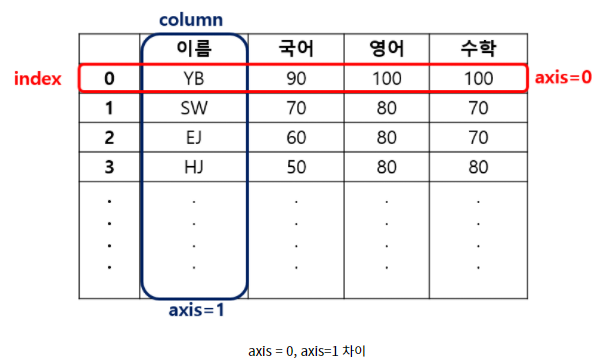

* Drop 함수
> * 행 삭제 : df.drop(index=0, axis= 0)
> * 열 삭제 : df.drop('변수명', axis= 1)
> * axis = 0은 dataframe 행 단위를 수정할 때 필요한 파라미터 값
> * axis = 1은 dataframe 열 단위를 수정할 때 필요한 파라미터 값 

In [40]:
# drop 함수를 사용하여 '3Pclass' column 삭제
titanic = titanic.drop("3Pclass", axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
titanic = titanic.drop(np.arange(880, 890), axis=0)
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
891,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S


In [42]:
titanic.shape

(882, 12)

### 8-3. 열 이름 수정

In [43]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
titanic = titanic.rename(columns={"Name":"Full Name"})
titanic.head()

,PassengerId,Survived,Pclass,Full Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Full Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
titanic.iloc[25:30]

,PassengerId,Survived,Pclass,Full Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S


In [47]:
titanic

,PassengerId,Survived,Pclass,Full Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
